# Online Retail Data
This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company
mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. The project work consists of demonstrating an aspect of the course using the selected 'Online Retail' dataset.

## Data set description
- **Source:** UK-based online retailer (year 2010-2011)
- **Rows:** Each row represents a transaction.
- **Columns:**
  - `InvoiceNo`: Invoice number
  - `StockCode`: Product code
  - `Description`: Product description
  - `Quantity`: Number of items purchased
  - `InvoiceDate`: Date/time of the invoice
  - `UnitPrice`: Price per unit
  - `CustomerID`: Customer ID
  - `Country`: Country of the customer

---

# Import data

In [1]:
import pandas as pd
import numpy as np

file_path = 'Dataset_Online_Retail.csv'
df = pd.read_csv(file_path)

df_cleaned = df.copy()

df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


---
# 1. Data Preprocessing

<h2 style="color:#d36c87;">1.1. Data cleaning</h2>

### Handling Missing Values

In [2]:
df_cleaned.isnull().sum()

df_cleaned = df_cleaned.dropna(subset=['CustomerID'])

### Remove Duplicates

In [3]:
df_cleaned = df_cleaned.drop_duplicates()

### Check and Convert Data Types

In [4]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

### Check Invalid Values

In [5]:
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]

### Identify and Remove Outliers

In [6]:
# Quantity Outliers
Q1_q = df_cleaned['Quantity'].quantile(0.25)
Q3_q = df_cleaned['Quantity'].quantile(0.75)
IQR_q = Q3_q - Q1_q
df_cleaned = df_cleaned[(df_cleaned['Quantity'] >= Q1_q - 1.5 * IQR_q) & (df_cleaned['Quantity'] <= Q3_q + 1.5 * IQR_q)]

#UnitPrice Outliers
Q1_p = df_cleaned['UnitPrice'].quantile(0.25)
Q3_p = df_cleaned['UnitPrice'].quantile(0.75)
IQR_p = Q3_p - Q1_p
df_cleaned = df_cleaned[(df_cleaned['UnitPrice'] >= Q1_p - 1.5 * IQR_p) & (df_cleaned['UnitPrice'] <= Q3_p + 1.5 * IQR_p)]

### Feature Engineering

In [7]:
# TotalPrice = Quantity * UnitPrice
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

### Export Clean Dataset

In [8]:
df_cleaned.to_csv("Dataset_Online_Retail_Cleaned.csv", index=False)

<h2 style="color:#d36c87;">1.2. Data integration</h2>

In [9]:
numerical_df = df_cleaned[['Quantity', 'UnitPrice', 'CustomerID', 'TotalPrice']].dropna()

### Covariance & Correlation Analysis

Covariance Matrix:
               Quantity  UnitPrice    CustomerID   TotalPrice
Quantity      45.930945  -3.665583 -1.698719e+03    45.917542
UnitPrice     -3.665583   2.390161 -2.138029e+01     7.311779
CustomerID -1698.719018 -21.380289  2.928123e+06 -2798.113013
TotalPrice    45.917542   7.311779 -2.798113e+03   174.635352

--------------------------

Correlation Matrix:
            Quantity  UnitPrice  CustomerID  TotalPrice
Quantity    1.000000  -0.349846   -0.146479    0.512696
UnitPrice  -0.349846   1.000000   -0.008082    0.357885
CustomerID -0.146479  -0.008082    1.000000   -0.123738
TotalPrice  0.512696   0.357885   -0.123738    1.000000

--------------------------



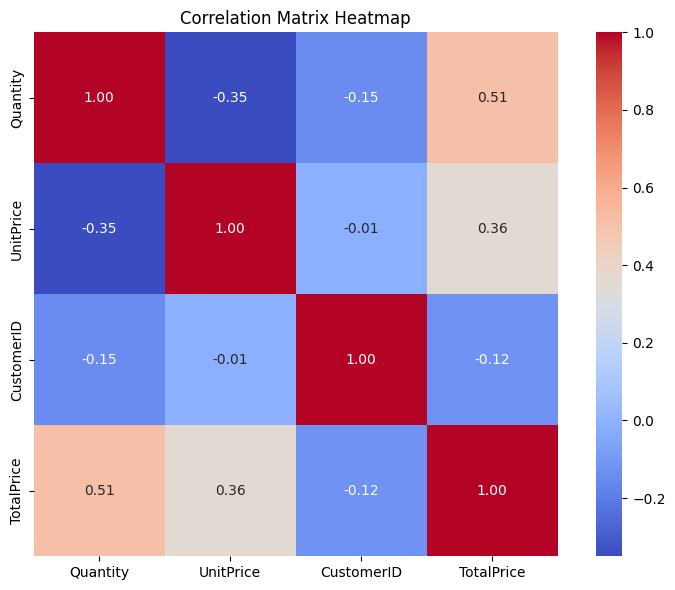

In [10]:
cov_matrix = numerical_df.cov()
corr_matrix = numerical_df.corr()

print("Covariance Matrix:")
print(cov_matrix)

print("")
print("--------------------------")
print("")

print("Correlation Matrix:")
print(corr_matrix)

print("")
print("--------------------------")
print("")

import seaborn as sns
import matplotlib.pyplot as plt

# Size of the plot
plt.figure(figsize=(8, 6))

# Correlation Matrix HeatMap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)

plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

<h2 style="color:#d36c87;">1.3. Data reduction</h2>

### Dimensionality reduction

### Numerosity reduction

### Data compression

<h2 style="color:#d36c87;">1.4. Data transformation and data discretization</h2>

In this part we will be identifying each category to see if there is some time of data transformation that is possible to do.

### Data Transformation

#### Data Smoothing

For this first part, the only category that shall be analyzed for such an treatment will be the UnitPrice. Let us visualize the category to take a conclusion. Since the only other category that would make sense would with time, we are using the time in the X-axis for this plot.

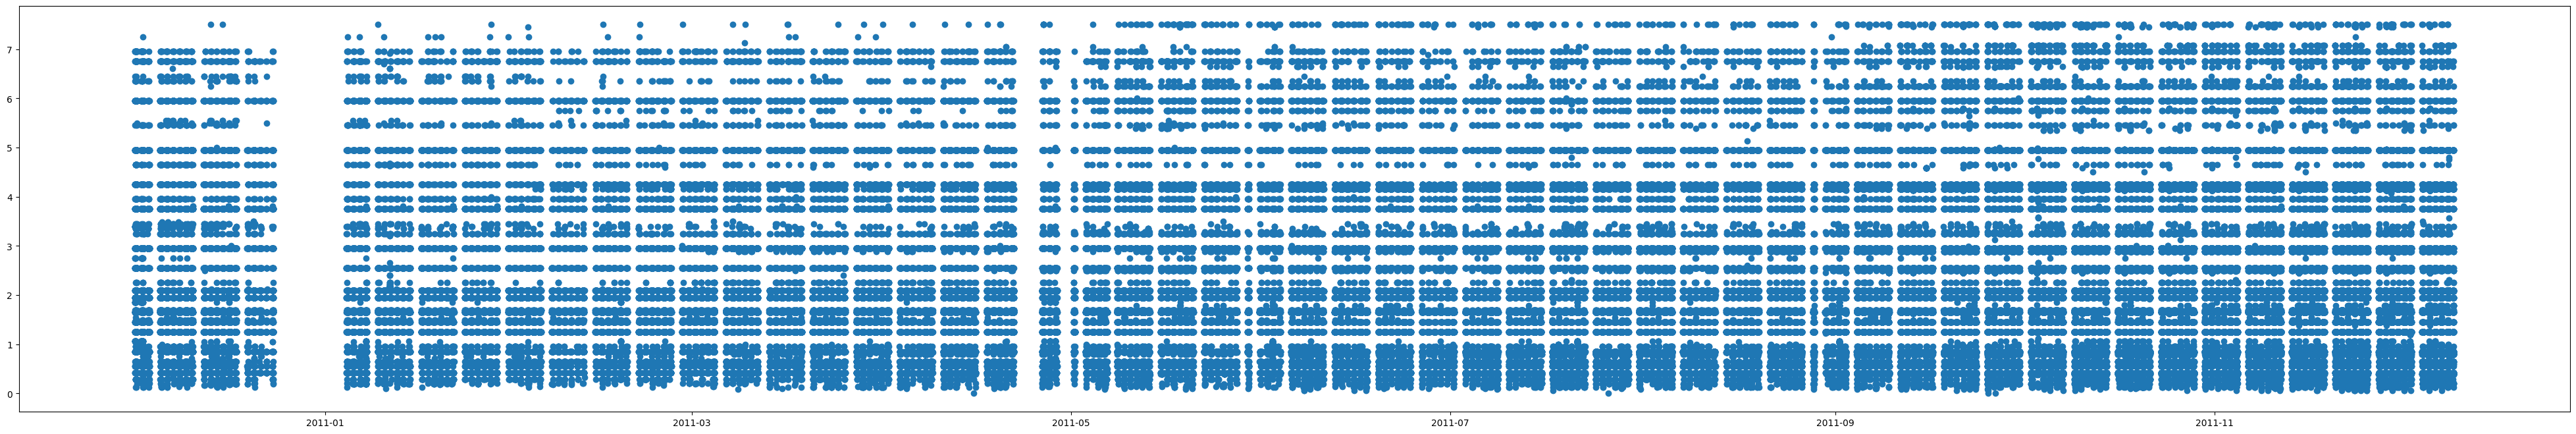

In [11]:
plt.figure(figsize=[50, 8])
plt.plot(df_cleaned['InvoiceDate'], df_cleaned['UnitPrice'], 'o')

After seeing this plot, we can clearly see that it does not make any sense to implement any smoothing algorithm since there are no appearance of any outliers. Additionally, all of the outliers have been already taken out before.

#### Data Aggregation

1. Total number of units sold by country

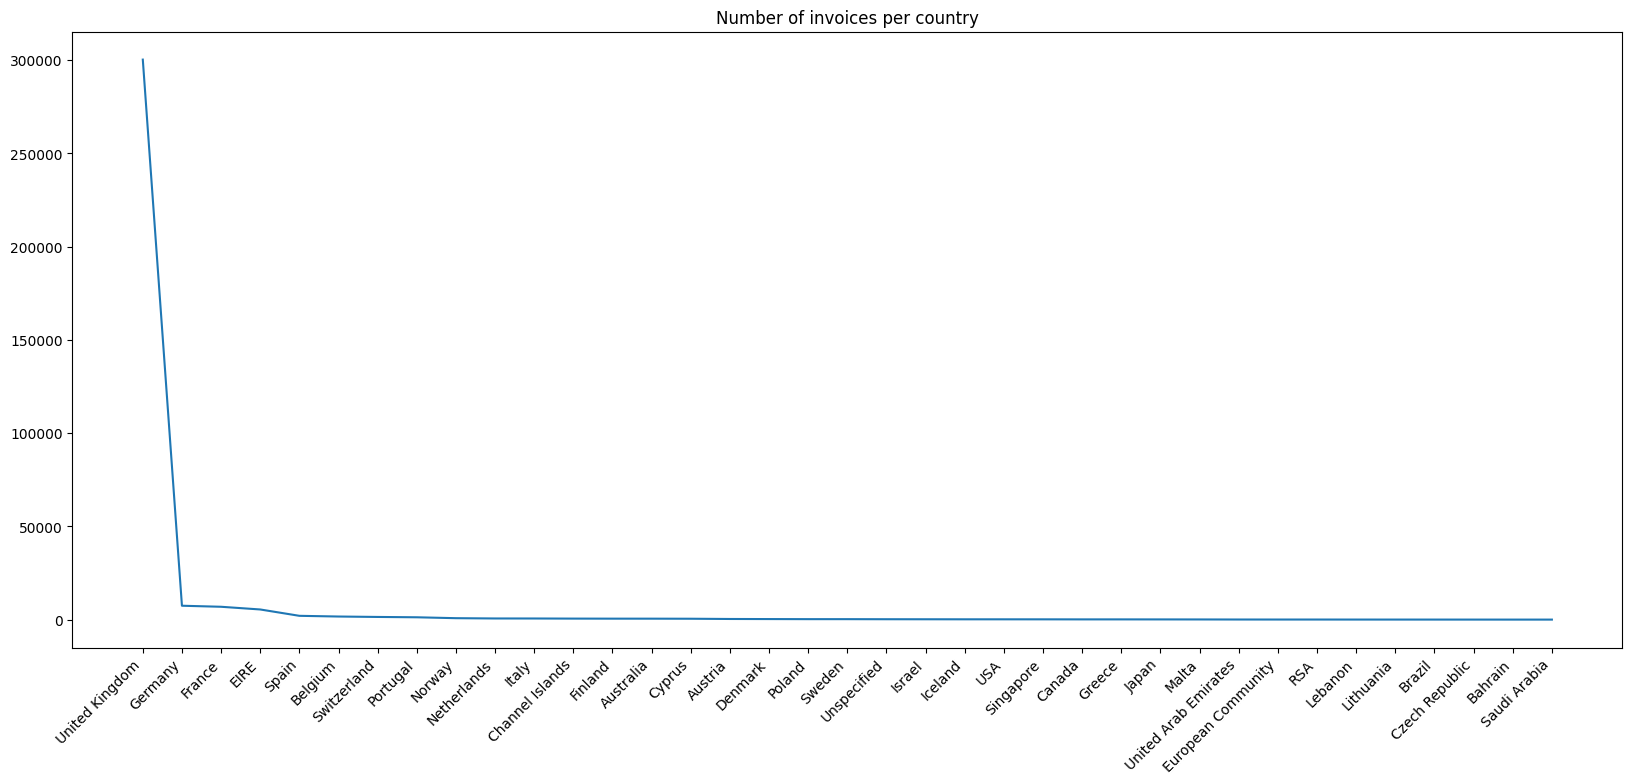

In [12]:
num_units_sold_by_country = df_cleaned.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)

plt.figure(figsize=[20, 8])
plt.xticks(rotation=45, ha='right')
plt.title("Number of invoices per country")
plt.plot(num_units_sold_by_country)


Let us now see what are the country with the least invoices.

In [13]:
#Number of total invoices
total_invoices = len(np.unique(df_cleaned['InvoiceNo']))
#Setting a limit
limit = total_invoices/100

#Printing new plot
active_countries = num_units_sold_by_country[num_units_sold_by_country>=limit].index

print("Number of countries before filtering:", len(num_units_sold_by_country))
print("Number of items sold before: ", num_units_sold_by_country.sum())
print("Filtering all countries that have less that 1 percent of the total sales...")
print("Number of countries after filtering:", len(active_countries))
print("Number of items sold after: ", num_units_sold_by_country[active_countries].sum())

Number of countries before filtering: 37
Number of items sold before:  333234
Filtering all countries that have less that 1 percent of the total sales...
Number of countries after filtering: 21
Number of items sold after:  332030


Since there are clearly a lot of countries that do not contribute much to the whole dataset and could bring some undesired patterns, it is better to remove those countries from the dataset.

In [14]:
transformed_data = df_cleaned[df_cleaned['Country'].isin(active_countries)]

2. Number of costumers per country

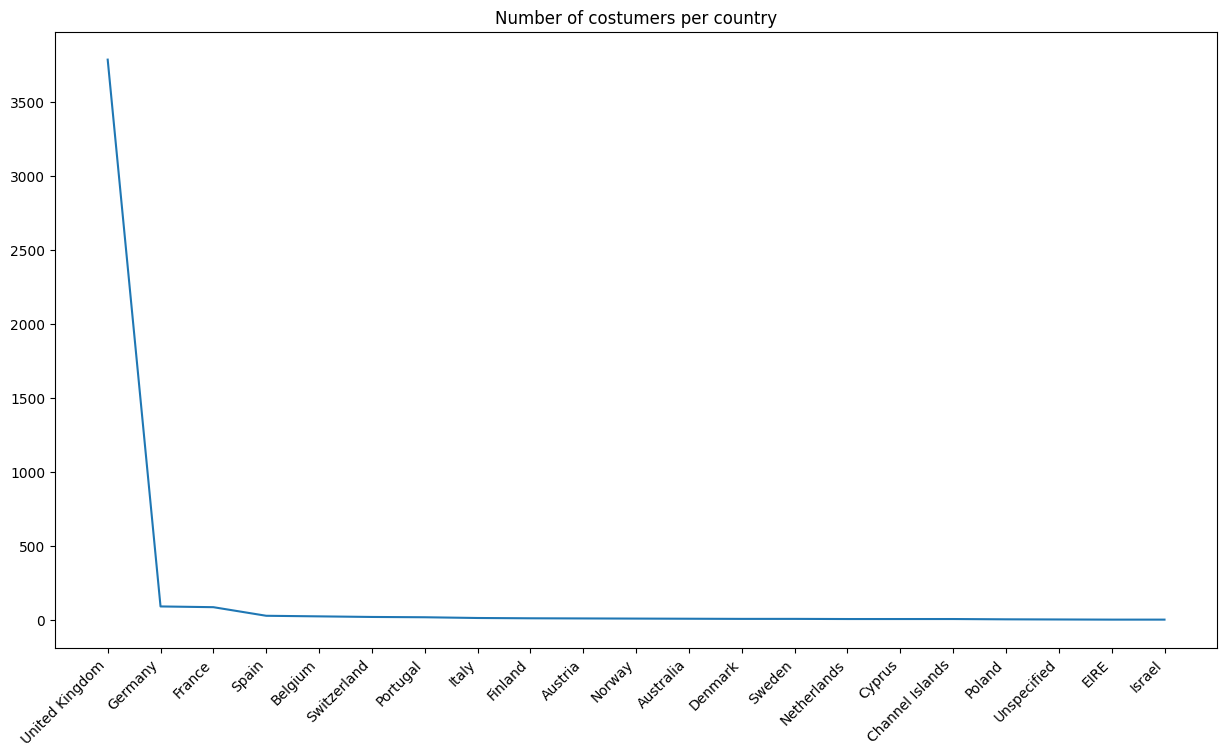

In [15]:
num_custumers_per_country = transformed_data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

plt.figure(figsize=[15,8])
plt.title("Number of costumers per country")
plt.xticks(rotation=45, ha='right')
plt.plot(num_custumers_per_country)

Let us see of there are any countries that have a considerable amount of low costumers.

In [16]:
total_costumers = len(np.unique(transformed_data['CustomerID']))
costumers_limit = total_costumers/200 #Limit is 0.5 %

active_costumers = num_custumers_per_country[num_custumers_per_country >= costumers_limit].index
print("Number of countries before filtering:", len(num_custumers_per_country))
print("Number of total costumers before: ", num_custumers_per_country.sum())
print("Filtering all countries that have less that 1 percent of the total sales...")
print("Number of countries after filtering:", len(active_costumers))
print("Number of total invoices after: ", num_custumers_per_country[active_costumers].sum())

Number of countries before filtering: 21
Number of total costumers before:  4165
Filtering all countries that have less that 1 percent of the total sales...
Number of countries after filtering: 6
Number of total invoices after:  4038


Since there are clearly a lot of countries that do not have many costumers compared to the whole dataset and could bring some undesired patterns, it is better to remove those countries from the dataset.

In [17]:
transformed_data = transformed_data[transformed_data['Country'].isin(active_costumers)]

3. Sales over time (Monthly)

Month
2010-12    20935
2011-01    16856
2011-02    15683
2011-03    21352
2011-04    18226
2011-05    22367
2011-06    21247
2011-07    21252
2011-08    21301
2011-09    32602
2011-10    40156
2011-11    53486
2011-12    14289
Freq: M, Name: InvoiceNo, dtype: int64


<Axes: title={'center': 'Number of invoices per month'}, xlabel='Month'>

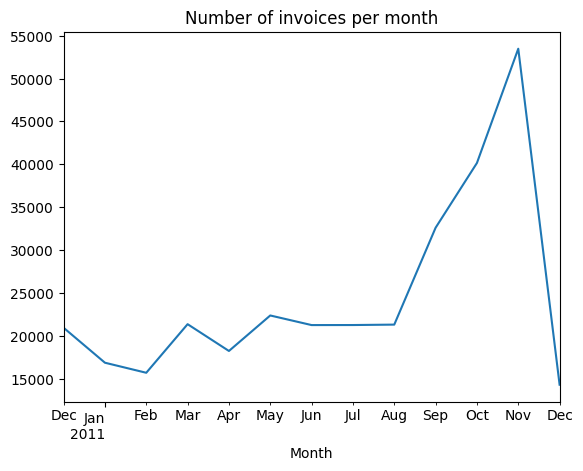

In [18]:
transformed_data['InvoiceDate'] = pd.to_datetime(transformed_data['InvoiceDate'])
transformed_data['Month'] = transformed_data['InvoiceDate'].dt.to_period('M')

monthly_sales = transformed_data.groupby(['Month'])['InvoiceNo'].count()
print(monthly_sales)

plt.xticks(rotation=45, ha='right')
plt.title("Number of invoices per month")
monthly_sales.plot()

Here, we can clearly see that that is a peek in sales during the final months of the year.

Let us now study the sales per day of the week.

<Axes: title={'center': 'Number of invoices per month'}, xlabel='Day'>

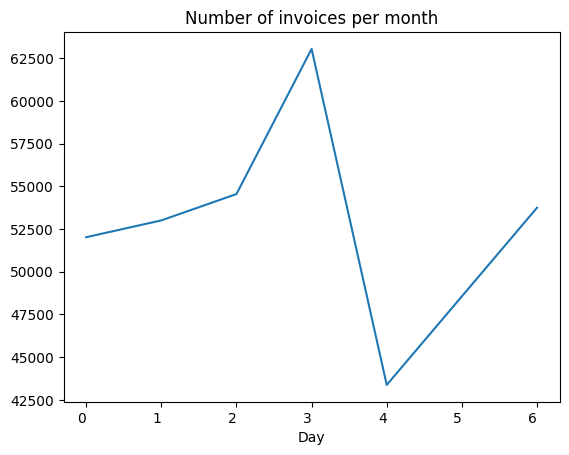

In [19]:

transformed_data['Day'] = transformed_data['InvoiceDate'].dt.weekday

day_sales = transformed_data.groupby(['Day'])['InvoiceNo'].count()


plt.xticks(rotation=45, ha='right')
plt.title("Number of invoices per month")
day_sales.plot()

Here we can also see that on the day three we have a peek of sales, this being on thursday.

#### Data Normalization

For this model, we decided to not do any data normalization, this because we rather work with raw values since it will be more about doing a business analysis than training a model for example.

#### Data Discretization

Let's start by binning the UnitPrice since it is the more obvious approach here.

In [20]:
transformed_data['UnitPriceBin'] = pd.cut(transformed_data['UnitPrice'], bins = 5)

#Costumer spend
customer_spend = transformed_data.groupby('CustomerID')['TotalPrice'].sum()
transformed_data['SpendLevel'] = pd.qcut(transformed_data['CustomerID'].map(customer_spend), q=4, labels=['Low', 'Med', 'High', 'Very High'])


#Other ideas
    #Countries (In and out of UK)
    # # of items purchased
    #...

print("Showing first 5 elements")
transformed_data.head()

Showing first 5 elements


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Day,UnitPriceBin,SpendLevel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2,"(1.501, 3.001]",Very High
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2,"(3.001, 4.5]",Very High
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2,"(1.501, 3.001]",Very High
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2,"(3.001, 4.5]",Very High
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2,"(3.001, 4.5]",Very High


---
# 2. Data Visualization